## Classification in View: Iris Dataset

### 1. Intouction
Interpreting how a model works is one of the most basic yet critical aspects of data science. You build a model which is giving you pretty impressive results, but what was the process behind it? As a data scientist, you need to have an answer to this often asked questions. This notebook describes the intuitions behind some of the the popular classification models used in datascience today. They include; Logistic regression, support vector machine, Decision trees and some popular Ensemble methods.  
>> **"If you can't explain it simply, you don't understand it well enough".
Albert Einstein**

We will be using a simple, yet popular multi-class labeled dataset -Iris, because it is easy to understand, plus it does not need to be cleaned so we can get into the nitty gritty of modelling as soon as possible. You can download the UCI dataset and get a description from [Kaggle.](https://www.kaggle.com/uciml/iris). Also, this notebook only interprets mathematical deductions. However, links will be provided for further studies on how selected algorithm's mathematical derivations are achieved. Without further ado, lets dive in.

In [1]:
#Import important libraries from python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load and view iris
iris = pd.read_csv('iris.csv')
iris.sample(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
129,130,7.2,3.0,5.8,1.6,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor


**As you can see, there is an 'Id' column that we need to drop from the dataframe.**

In [3]:
iris = iris.drop(['Id'], axis=1)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**There are no null values in the dataset.**

In [5]:
iris.describe() # Describes some statistical composition of the data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**We have a perfectly balanced dataset.** 
> Check what inbalanced dataset means

### 2. Some Visual Analysis

These colourful plots are gotten from seaborn library. They are also quite easy to use. Just a few line of code and viola! Go through the features at [Seaborn.org](https://seaborn.pydata.org/) to help you start creating your own awesome plots.

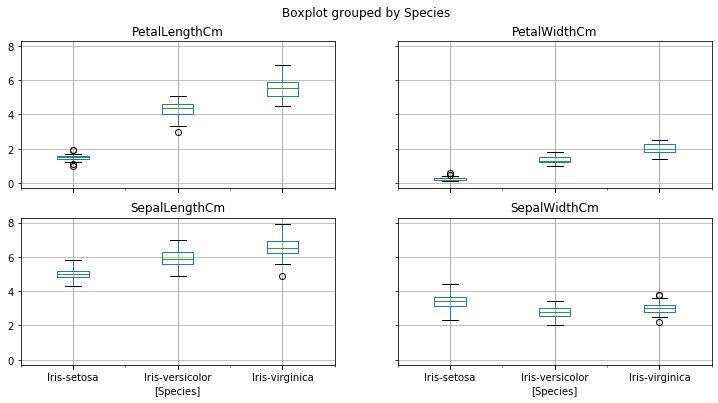

In [7]:
#Boxplots displaying the range (min, quartiles and max) of a distribution.
iris.boxplot(by="Species", figsize=(12, 6))
plt.show()

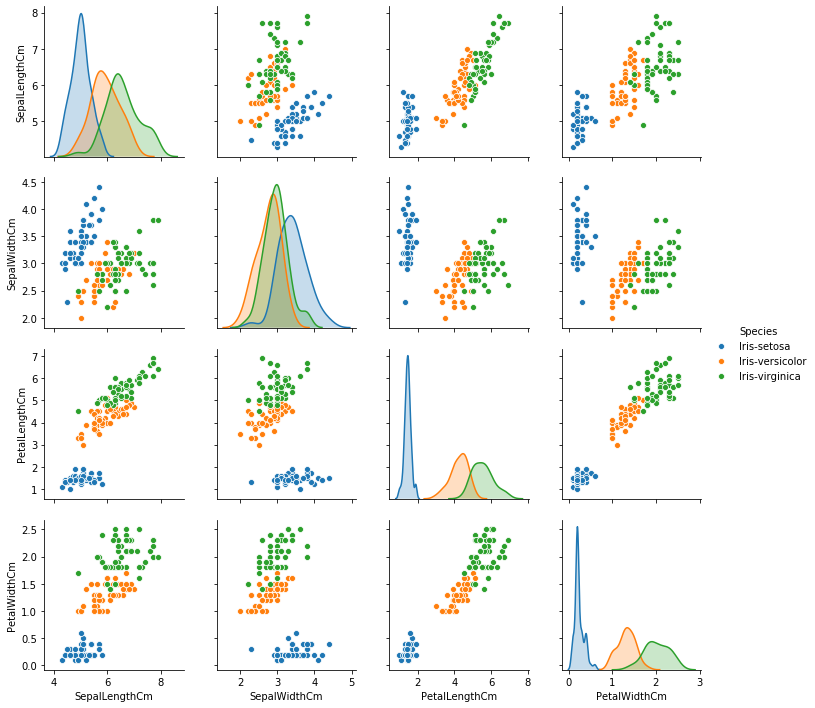

In [8]:
#Pairplots showing all variables paired with all other variables
sns.pairplot(iris,hue='Species')

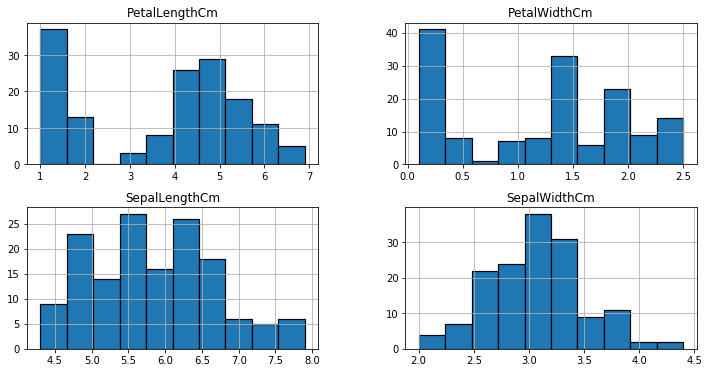

In [9]:
# Distribution plots
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

### 3. Pre-Processing

In [10]:
# use sklearn's label encoder to map 'Species' such that Iris-setosa=0, Iris-versicolor=1 and Iris-virginica=2
# next, standardise independent variables especially for models that are sensitive to outliers.

from sklearn.preprocessing import RobustScaler

train = iris.iloc[:, :4]
scaler = RobustScaler()

X = scaler.fit_transform(train)
X[:5]

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333]])

In [11]:
from sklearn.preprocessing import LabelEncoder

target = iris['Species']
encoder =  LabelEncoder()
y = encoder.fit_transform(target)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# Now that we have X and y in good learning states, we can split dataset into train and test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

### 4. Model Training
***Perequisite: [Linear Regression](https://meesaan.github.io/enigma.github.io/ml/linear-regression/).***

### 4.1. Logistic Regression.

In a lot of ways, linear regression and logistic regression are similar. However, one major difference is, where linear regression is used to predict continous values, logistic regression is used for predicting classes. Logistic regression is a classification algorithm that predicts target variables in a boolean order. That is, it askes the question, is a flower Iris-Setosa or not? Yes or No? True or False? (I am aware I am asking a question of a binary intuition while we have a multiclass dataset. Walk with me, we will address this shortly). Also, unlike linear regression that fits a line to the data, logistic regression fits an 'S' shaped logistic function - also called sigmoid function that can take any real-valued number and map it into a value between 0 and 1 as seen in the diagram below.  
<img src='logistic.png'>
In other words, if the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. One thing to note is that, the sigmoid function with formula, <img src='form.png'> is responsible for estimating probabilities that squashes the predicted value into a range of (0, 1) since the numerator is always smaller than the denominator by 1. So far so good up until this point? Good! Now, lets see how a logistic regression model is trained. 

This image from [Experfy](https://www.experfy.com/blog/the-logistic-regression-algorithm) below does justice to visualise how logistic regression works.  
<img src='logistic2.png'>

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the probabilities of the collection/sample of flowers given their sepal length, sepal width and so on... Then the sigmoid function groups each flower's probability as a 0 or 1. For example, if the estimated probability that an iris flower-Iris-setosa is greater than 50%, then the model predicts that the flower belongs to that class (called the positive class, labeled “1”) otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”).  If you want to understand the maths of it, you can head on to [Christoph's Page](https://christophm.github.io/interpretable-ml-book/logistic.html). He does a brilliant job at explaining its derivations as simple as possible. Remember how in Linear Regression you estimate the coefficients or weights and bias using ordinary least squares? Well, in Logistic Regression, we estimate the coefficients using Maximum Likelihood Estimation (MLE). The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. 
Have you noticed that Logistic Regression is a binary classifier yet? However, we have a multinomial classification task at hand. How can we solve this problem with Logistic Regression? One way is to use One-Vs-Rest algorithm. It basically trains the data as three separate binary classification problem. In its learning stage,
One-Vs-Rest is implemented by training 3 logistic regression classifiers, one for each of the K classes (Iris-Setosa, Iris-Versicolor and Iris-Virginica) in the training dataset. When training the classifier for Iris-Setosa, it treats flowers 1-50 as +ve samples (y==1) and Iris-Versicolor and Iris-Virginica as -ve samples (y==0). When training the classifier for Class 2, we will treat flowers 51-100  as +ve samples (y==1) while Iris-Setosa and Iris-Virginica are treated as -ve samples (y==0). This will continue for all the classes. During prediction-One vs rest prediction of the test input, it computes the “probability” that it belongs to each class using the trained logistic regression classifiers. Your one-vs-rest prediction function will pick the class for which the corresponding logistic regression classifier outputs the highest probability and return the class label (1, 2,..., or K) as the prediction for the input example.
Now that we have a fairly good intuition, we can use scikit-learn for training and prediction.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(solver='lbfgs', max_iter=500,  multi_class='multinomial', penalty='none', random_state=0)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_pred = log_clf.predict(X_test)

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, log_pred) )

print( accuracy_score(y_test, log_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


In [16]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, log_pred)
cnf_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

### 4.2. Support Vector Machhines
A Support Vector Machine (SVM) is a powerful and versatile Machine Learning model. Its versatility enables it to train both linear or nonlinear classification. The intuition behind SVMs is to find a line or hyperplane in n-dimentional space, where n is the number of features, that separates/classifies the data points. Let us assume we have two classes for a minute; Iris-Setosa and Iris-Versicolor. Can they be effortlessly separated with a straight line? Yes! they can, per our pairplot above. This is because they are linearly separable. 
<img src = 'svm.png'>
Reviewing the diagram above, you can think of an SVM classifier as fitting the widest possible margin(represented by the parallel dashed lines) between the classes. Margin is the distance between two planes and our goal is to find the widest possible or maximum margin. Intuitively, achieving a wider margin yields lesser generalisation error. The algorithm finds the best possible margin by gaining 'support' from data points found along the edges of the margin. Those data points are called support vectors, hence the name, Support Vector Machine. Suppose you delete some points after training and a support vector is affected, the position of the hyperplane would change. This means that the hyperplane drawn is dependent on the position of the support vector. How then is this marin achieved? In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function. In SVM, we take the output of the linear function and if that output is greater than 1, we identify it with one class and if the output is -1, we identify is with another class. Since the threshold values are changed to 1 and -1 in SVM, we obtain this reinforcement range of values [-1,1] which acts as the margin.
<img src = 'svm2.png'>
SVMs are sensitive to the feature scales, as you can see above. In the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible margin is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary in the right plot looks much better. If we strictly impose that all instances must be off the marin and on the right side, this is called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to outliers. To avoid these issues, use a more flexible model. The objective is to find a good balance between keeping the margin as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the margin or even on the wrong side). This is called soft margin classification. When creating an SVM model using Scikit-Learn, we can specify a number of hyperparameters. C is one of those hyperparameters. You can practice with this on your own, maybe with a larger dataset. However, note that a model with lots of margin violations will probably generalize better. If your SVM model is overfitting, you can try regularizing it by reducing C.

In [17]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', random_state=0)

svm_clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
svm_pred = svm_clf.predict(X_test)
print( classification_report(y_test, svm_pred) )

print( accuracy_score(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


In [19]:
svm_matrix = metrics.confusion_matrix(y_test, svm_pred)
svm_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

### 3.3 Decision Trees
Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets. In general, a decision tree asks a "Yes or No" question and then makes classification based on the answer. To understand Decision Trees, let’s build one and take a look at how it is trained. 

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

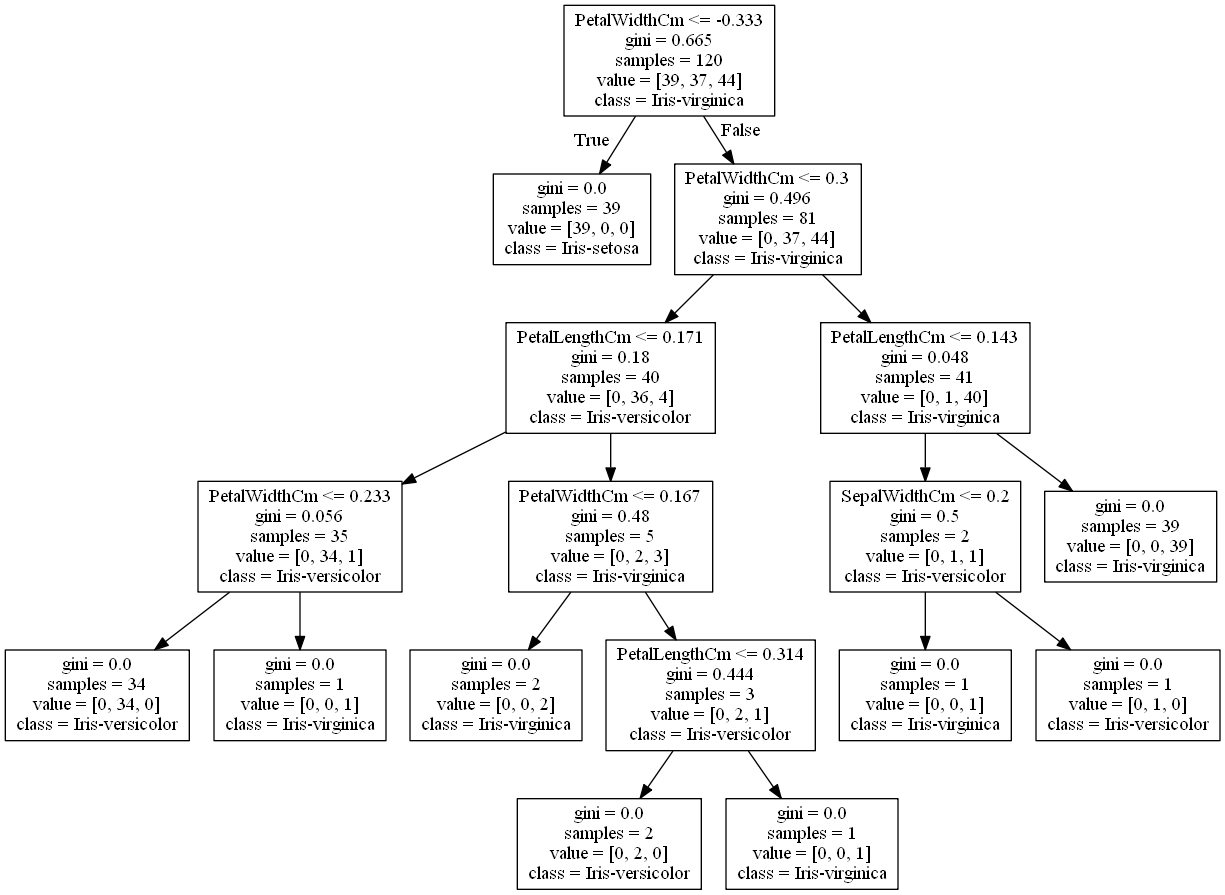

In [21]:
#You can visualize the trained Decision Tree by first using the export_graphviz() method to output a graph definition file
#called iris_tree.dot:

feature_names = list(train)
target_names =  iris.Species.unique()

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

# Export as dot file

dot_data = export_graphviz(tree_clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 


# Show graph
Image(graph.create_png())

Suppose you find an iris flower and you want to classify it. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal width is smaller than -0.333cm (Remember that we have scaled the dataset, hence negative values). If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (that means it does not have any child nodes), so it does not ask any questions: its simply looks at the predicted class for that node, and the Decision Tree predicts that your flower is an Iris-setosa.
Now suppose you find another flower, and this time the petal width is greater than -0.333cm. You must move down to the root’s right child node(depth 1, right), which is not a leaf node, so the node asks another question: is the petal width smaller than 0.3cm? If it is, then your flower is most likely an Iris versicolor (depth 2, left). If not, it is likely an Iris virginica (depth 2, right). To further determine a class for this flower, it goes on to ask about its petal length and so on and so forth. It’s really that simple. A node’s samples attribute counts how many training instances it applies to. For example, 81 training instances have a petal width greater than -0.333cm (depth 1, right), and of those 81, 40 have a petal width smaller than 0.3cm (depth 2, left). 
A node’s value attribute tells you how many training instances of each class this node applies to: for example, the node in depth 1 applies to 0 Iris setosa, 37 Iris versicolor, and 44 Iris virginica. 
Finally, a node’s gini attribute measures its impurity: a node is “pure” (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris setosa training instances, it is pure and its gini score is 0.

The equation below shows how the training algorithm calculates the gini score Gi of the ith node. The depth-2 left node has a gini score equal to 1 – (0/40)2 – (36/40)2 – (4/40)2 = 0.18. 

NOTE
Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two children (i.e., questions only have yes/no answers).The algorithm works by first splitting the training set into two subsets using a single feature k and a threshold tk (e.g., “petal width ≤ 0.333cm”). How does it choose k and tk? It searches for the pair (k, tk) that produces the purest subsets (weighted by their size). Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the max_depth hyperparameter), or if it cannot find a split that will reduce impurity.  
As you can see, the CART algorithm is a greedy algorithm: it greedily searches for an optimum split at the top level, then repeats the process at each subsequent level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a solution that’s reasonably good but not guaranteed to be optimal. To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the max_depth hyperparameter (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting. The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree: min_samples_split (the minimum number of samples a node must have before it can be  split), min_samples_leaf (the minimum number of samples a leaf node must have), min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances), max_leaf_nodes (the maximum number of leaf nodes), and max_features (the maximum number of features that are evaluated for splitting at each node). Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model.  

In [22]:
tree_pred = tree_clf.predict(X_test)
print( classification_report(y_test, tree_pred) )

print( accuracy_score(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


### 4.4. Ensemble Learnng.
Have you watched a television game show called Who wants to be a Millionnaire? Basically, you are asked a series of questions where every correct answer gives you some amount of money till you become a millionnaire. However, you are given three life lines to help you get to the final stage. One is phone a fried, take a 50:50 chance and ask the audience. Most players often select answers given by majority of the audience. This is called the wisdom of the crowd which demonstrates how ensemble learning works. Similarly, if you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.  

### 4.4.1. Voting Classifiers
Let us assume that you have trained a some classifiers as above, each one achieving about 80% accuracy. You have a Logistic Regression classifier, an SVM classifier, a Decision Tree classifier and even a K-Nearest Neighbors classifier.  
A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier.  Make sure that all classifiers are perfectly independent, making uncorrelated errors, which is clearly not the case because they are trained on the same data. They are likely to make the same types of errors, so there will be many majority votes for the wrong class, reducing the ensemble’s accuracy. TIP Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving the ensemble’s accuracy.  


In [23]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('dt', tree_clf), ('svc', svm_clf), ('knn', knn_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=500,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='none',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_dept...
                                  coef0=

In [24]:
#Let’s look at each classifier’s accuracy on the test set:

for clf in (log_clf, tree_clf, svm_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 1.0
DecisionTreeClassifier 1.0
SVC 1.0
KNeighborsClassifier 0.9666666666666667
VotingClassifier 1.0


### 4.4.2. Bagging & Pasting.
Another approach of ensemble learning is to train a classifier using random subsets of the dataset. When sampling is performed with replacement, this method is called bagging, short for bootstrap aggregating. When sampling is performed without replacement, it is called pasting. In other words, both bagging and pasting allow training instances to be sampled several times across multiple predictors, but only bagging allows training instances to be sampled several times for the same predictor.  
<img src= 'bagging.png'> 

[Image Source](https://hudsonthames.org/bagging-in-financial-machine-learning-sequential-bootstrapping-python/)

Bootstraping creates the foundation of Bagging technique. Bootstrap is a sampling technique in which we select “n” observations out of a population of “n” observations. But the selection is entirely random, i.e., each observation can be chosen from the original population so that each observation is equally likely to be selected in each iteration of the bootstrapping process. After the bootstrapped samples are formed, separate models are trained with the bootstrapped samples. In real experiments, the bootstrapped samples are drawn from the training set, and the sub-models are tested using the testing set. The final output prediction is combined across the projections of all the sub-models.  

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode (i.e., the most frequent prediction, just like a hard voting classifier) for classification, or the average for regression. Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set. 
Bagging and Pasting in Scikit-Learn
Scikit-Learn offers a simple API for both bagging and pasting with
the BaggingClassifier class (or BaggingRegressor for regression). The
following code trains an ensemble of 500 Decision Tree classifiers:5 each is
trained on 100 training instances randomly sampled from the training set
with replacement (this is an example of bagging, but if you want to use
pasting instead, just set bootstrap=False). The n_jobs parameter tells ScikitLearn the number of CPU cores to use for training and predictions (–1 tells Scikit-Learn to use all available cores):


In [25]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [26]:
bag_pred = bag_clf.predict(X_test)

print( classification_report(y_test, bag_pred) )

print( accuracy_score(y_test, bag_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0



NOTE
The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities (i.e., if it has a predict_proba() method), which is the case with Decision Tree classifiers.

### 4.4.3. Random Forests
As an example of an Ensemble method, you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predictions of all the individual trees, then predict the class that gets the most votes Such an ensemble of Decision Trees is called a Random Forest, and despite its simplicity, this is one of the most powerful Machine Learning algorithms available today.

As we have discussed, a Random Forest is an ensemble of Decision Trees,
generally trained via the bagging method (or sometimes pasting), typically with max_samples set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier class, which is more convenient and optimized for Decision Trees (similarly, there is a RandomForestRegressor class for regression tasks). The following code uses
all available CPU cores to train a Random Forest classifier with 500 trees (each limited to maximum 16 nodes):

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=16,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [28]:
rf_pred = rf_clf.predict(X_test)

print( classification_report(y_test, rf_pred) )

print( accuracy_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


With a few exceptions, a RandomForestClassifier has all the hyperparameters
of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself. The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node as in Decision Tree, it searches for the best feature among a random subset of features. The algorithm results in greater tree diversity, which (again) trades a higher bias for a lower variance, generally yielding an overall better model. 
**Feature Importance:**
Yet another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it. Scikit-Learn computes this score automatically for each feature after training, then it scales the results so that the sum of all importances is equal to 1. You can access the result using the feature_importances_ variable.
For example, the following code trains a RandomForestClassifier on the iris
dataset (introduced in Chapter 4) and outputs each feature’s importance. It
seems that the most important features are the petal width (44%) and length (43%), while sepal length and width are rather unimportant in
comparison.

In [29]:
for name, score in zip(iris[feature_names],
rf_clf.feature_importances_):
    print(name,  score)

SepalLengthCm 0.10729315644324813
SepalWidthCm 0.02680232717612246
PetalLengthCm 0.44940272649616436
PetalWidthCm 0.4165017898844651


### 4.4.4. Boosting 
Boosting (originally called hypothesis boosting) refers to any Ensemble
method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. There are many boosting methods available, but by far the most popular are AdaBoost (short for Adaptive Boosting) and Gradient Boosting. Let’s start with AdaBoost.  


### 4.4.4a. AdaBoost
One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost. For example, when training an AdaBoost classifier, the algorithm first trains a base classifier (such as a Decision Tree) and uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instance weights, and so on. The algorithm stops when the desired number of predictors is reached, or when a perfect predictor is found. To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights αj. The predicted class is the one that receives the majority of weighted votes. Instead of a Decision Tree, AdaBoost uses a Decision Stump which is a decision tree with max_depth = 1, i.e., Tree of single decision node and two leaf nodes. The n_estimators parameters in AdaBoost sets the number of Decision Stumps.

Scikit-Learn uses a multiclass version of AdaBoost called SAMME (which
stands for Stagewise Additive Modeling using a Multiclass Exponential loss function). When there are just two classes, SAMME is equivalent to AdaBoost. If the predictors can estimate class probabilities (i.e., if they have a predict_proba() method), Scikit-Learn can use a variant of SAMME called SAMME.R (the R stands for “Real”), which relies on class probabilities rather than predictions and generally performs better.
The following code trains an AdaBoost classifier based on 200 Decision
Stumps using Scikit-Learn’s AdaBoostClassifier class (as you might expect, there is also an AdaBoostRegressor class). 

TIP
If your AdaBoost ensemble is overfitting the training set, you can try
reducing the number of estimators or more strongly regularizing the base
estimator.
 

In [30]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME", learning_rate=0.1)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [31]:
ada_pred = ada_clf.predict(X_test)

print( classification_report(y_test, ada_pred))

print( accuracy_score(y_test, ada_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


### Gradient Boosting 
Another very popular boosting algorithm is Gradient Boosting. Just like
AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of
tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.  

Put simply, Fit a model to the given Training set. Calculate the Residual Errors which become the new training instances. A new model is trained on these and so on. An addition of all the models is selected for making predictions.

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [33]:
gb_pred = gb_clf.predict(X_test)

print( classification_report(y_test, gb_pred))

print( accuracy_score(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


### 5. Conclusion
